## Prep pCVP2-BRI1-mCitrine seu object with metadata

In [1]:
library(tidyverse)
library(Seurat)
library(cowplot)
library(ComplexHeatmap)
library(circlize)
library(GeneOverlap)
library(gprofiler2)
library(ggrepel)
library(ggplot2)
library(muscat)
library(purrr)
library(limma)
library(scran)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Attaching SeuratObject


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualizati

In [2]:
library(future)
#for 200gb ram 
options(future.globals.maxSize = 200000 * 1024^2)

In [3]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Stream 8

Matrix products: default
BLAS/LAPACK: /hpc/group/pbenfeylab/tmn23/miniconda3/envs/muscat/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] future_1.31.0               scran_1.26.0               
 [3] scuttle_1.8.0               SingleCellExperiment_1.20.0
 [5] SummarizedExperiment_1.28.0 Biobase_2.58.0             
 [7] GenomicRanges_1.50.0        GenomeInfoDb_1.34.8        
 [9] IRanges_2.32.0     

In [4]:
rc.integrated <- readRDS("../../CheWei/scRNA-seq/Integrated_Objects/rc.integrated_11S_CVP_BRI1_seu3_20230315.rds")

In [5]:
rc.integrated

An object of class Seurat 
71788 features across 72381 samples within 3 assays 
Active assay: integrated (17520 features, 17520 variable features)
 2 other assays present: RNA, SCT
 4 dimensional reductions calculated: pca, umap, umap_3D, umap_2D

In [6]:
# remove sc_12 dc1 dc2
rc.integrated <- subset(rc.integrated, subset = orig.ident %in% c("briT", "briTR","sc_130", "sc_131", "sc_132", "sc_134", "sc_135", "sc_136"))


In [7]:
table(rc.integrated$orig.ident)


  briT  briTR sc_130 sc_131 sc_132 sc_134 sc_135 sc_136 
  7483   8318   6589   7615   6550   7745   5038   6089 

In [8]:
rc.integrated$geno <- rc.integrated$orig.ident
rc.integrated$geno <- gsub("briT","bri1_T",rc.integrated$geno) 
rc.integrated$geno <- gsub("bri1_TR","pCVP2_BRI1_Citrine_bri1_T",rc.integrated$geno)
rc.integrated$geno <- gsub("sc_130","WT",rc.integrated$geno)
rc.integrated$geno <- gsub("sc_131","bri1_T",rc.integrated$geno)
rc.integrated$geno <- gsub("sc_132","pCVP2_BRI1_Citrine_bri1_T",rc.integrated$geno)
rc.integrated$geno <- gsub("sc_134","WT",rc.integrated$geno)
rc.integrated$geno <- gsub("sc_135","bri1_T",rc.integrated$geno)
rc.integrated$geno <- gsub("sc_136","pCVP2_BRI1_Citrine_bri1_T",rc.integrated$geno)

In [9]:
rc.integrated$source <- rc.integrated$orig.ident
rc.integrated$source <- gsub("briT","Graeff-2021",rc.integrated$source) 
rc.integrated$source <- gsub("bri1_TR","Graeff-2021",rc.integrated$source)
rc.integrated$source <- gsub("Graeff-2021R","Graeff-2021",rc.integrated$source)
rc.integrated$source <- gsub("sc_130","Benfey",rc.integrated$source)
rc.integrated$source <- gsub("sc_131","Benfey",rc.integrated$source)
rc.integrated$source <- gsub("sc_132","Benfey",rc.integrated$source)
rc.integrated$source <- gsub("sc_134","Benfey",rc.integrated$source)
rc.integrated$source <- gsub("sc_135","Benfey",rc.integrated$source)
rc.integrated$source <- gsub("sc_136","Benfey",rc.integrated$source)


In [10]:
rc.integrated$rep <- rc.integrated$orig.ident
rc.integrated$rep <- gsub("briT","1",rc.integrated$rep)
rc.integrated$rep <- gsub("bri1_TR","1",rc.integrated$rep)
rc.integrated$rep <- gsub("sc_130","2",rc.integrated$rep)
rc.integrated$rep <- gsub("sc_131","2",rc.integrated$rep)
rc.integrated$rep <- gsub("sc_132","2",rc.integrated$rep)
rc.integrated$rep <- gsub("sc_134","3",rc.integrated$rep)
rc.integrated$rep <- gsub("sc_135","3",rc.integrated$rep)
rc.integrated$rep <- gsub("sc_136","3",rc.integrated$rep)

In [11]:
table(rc.integrated$orig.ident, rc.integrated$geno)

        
         bri1_T pCVP2_BRI1_Citrine_bri1_T   WT
  briT     7483                         0    0
  briTR       0                      8318    0
  sc_130      0                         0 6589
  sc_131   7615                         0    0
  sc_132      0                      6550    0
  sc_134      0                         0 7745
  sc_135   5038                         0    0
  sc_136      0                      6089    0

In [30]:
table(rc.integrated$orig.ident, rc.integrated$source)

        
         Benfey Graeff-2021
  briT        0        7483
  briTR       0        8318
  sc_130   6589           0
  sc_131   7615           0
  sc_132   6550           0
  sc_134   7745           0
  sc_135   5038           0
  sc_136   6089           0

In [14]:
feature_names <- read_tsv("../data/features.tsv.gz", col_names = c("AGI", "Name", "Type")) %>%
  select(-Type) %>%
  distinct()

Rows: 32833 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): AGI, Name, Type

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
rc.integrated$geno <- factor(rc.integrated$geno, levels=c("WT", "bri1_T", "pCVP2_BRI1_Citrine_bri1_T"))

## Cell and developmental stage metadata

- Developmental stage: `time_zone`
- Cell type:`cell_type`
- Combination of cell type and developmental stage: `time_zone_cell_type`
- Combination of cell type and developmental stage with cell subtypes (not used): `time_zone_cell_subtypes` 

In [16]:
rc.integrated$cell_type <- rc.integrated$celltype.anno.Li.crude
rc.integrated$time_zone <- rc.integrated$time.anno
rc.integrated$time_zone_cell_type <- rc.integrated$time.celltype.anno.Li.crude

In [17]:
table(rc.integrated$orig.ident, rc.integrated$cell_type)

        
         Atrichoblast Columella Cortex Endodermis Lateral Root Cap Pericycle
  briT            640       403    332        401             2368      1750
  briTR           700       637    228        442             4148      1167
  sc_130         1445       895    972        725             1058       143
  sc_131         1441       672    777        490             1800       812
  sc_132         1089       474    720        544             1597       554
  sc_134         1171       582    906        573             2101       633
  sc_135         1055       294    544        480              991       428
  sc_136         1176       649    878        617             1240       247
        
         Phloem Procambium Quiescent Center Trichoblast Xylem
  briT      204        815                7         200   363
  briTR     227        358               13         148   250
  sc_130     52        127                0        1000   172
  sc_131    130        320               

In [18]:
table(rc.integrated$time.anno)


         Distal Columella   Distal Lateral Root Cap                Elongation 
                     3943                      5190                     15349 
               Maturation                  Meristem        Proximal Columella 
                    10718                      9559                       633 
Proximal Lateral Root Cap 
                    10035 

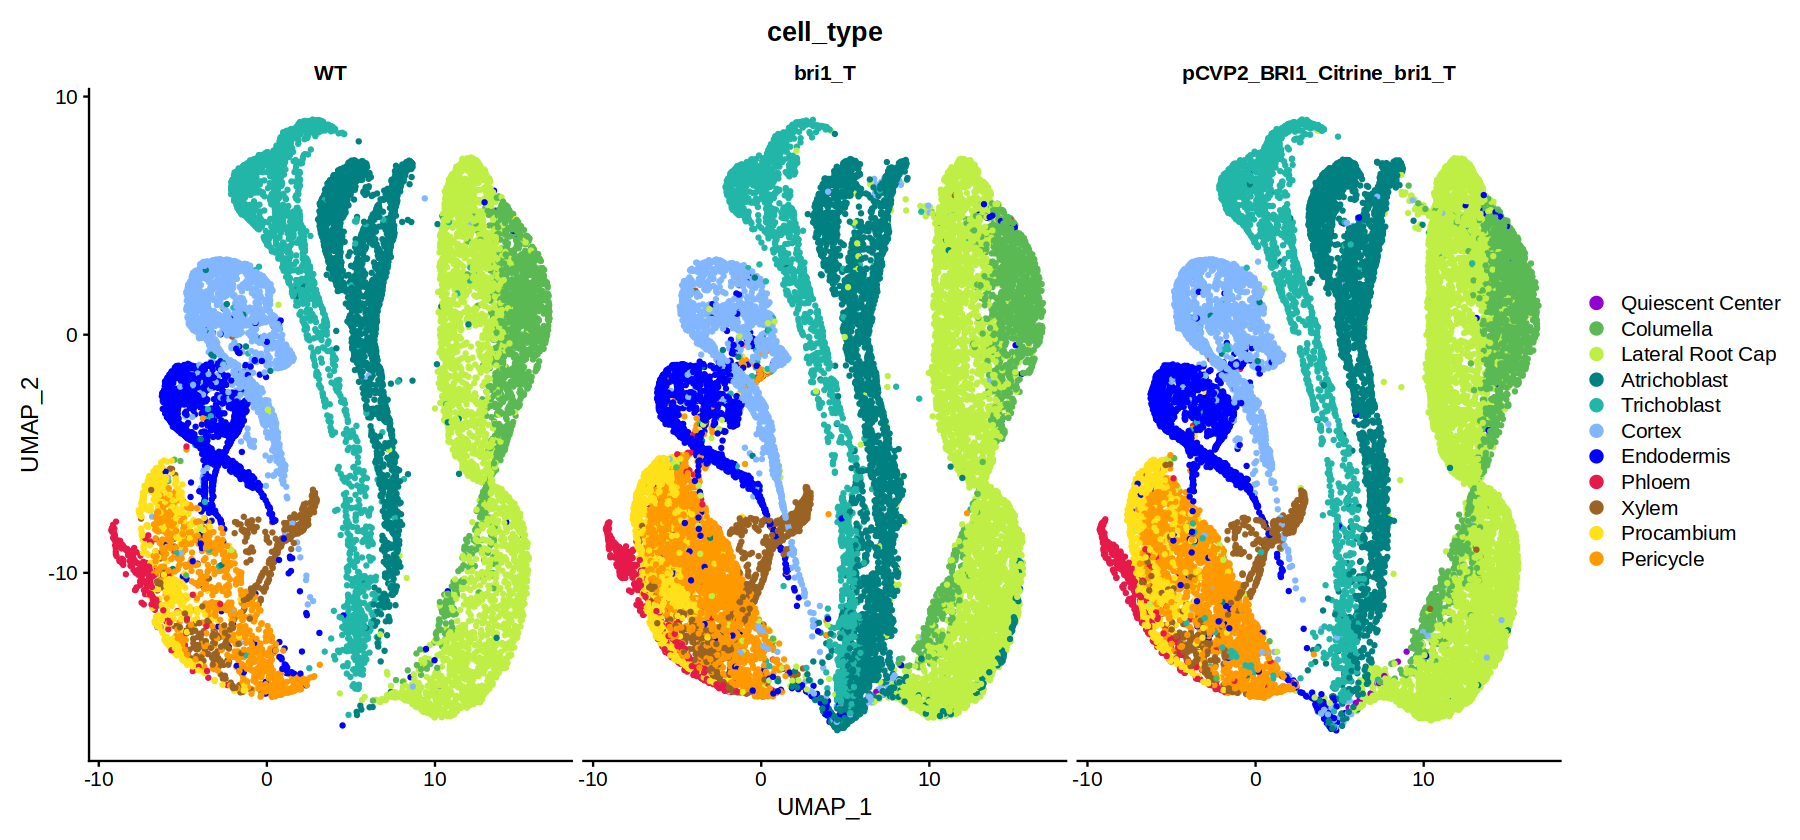

In [19]:
# Plot celltype annotation Li
order <- c("Quiescent Center", "Ground Tissue","Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Phloem","Protophloem", "Xylem", "Procambium","Pericycle","Phloem Pole Pericycle", "Protoxylem", "Metaxylem", "Unknown")
palette <- c("#9400D3", "#DCD0FF","#5AB953", "#BFEF45", "#008080", "#21B6A8", "#82B6FF", "#0000FF","#E6194B", "#DD77EC", "#9A6324", "#FFE119", "#FF9900", "#FFD4E3", "#9A6324", "#DDAA6F", "#EEEEEE")
rc.integrated$cell_type <- factor(rc.integrated$cell_type, levels = order[sort(match(unique(rc.integrated$cell_type),order))])
color <- palette[sort(match(unique(rc.integrated$cell_type),order))]


options(repr.plot.width=15, repr.plot.height=7)

(BR_cell <- DimPlot(rc.integrated, reduction = "umap", group.by = "cell_type", cols = color, split.by = 'geno', pt.size = 0.75, ncol=3)) 

Warning message in FeaturePlot(rc.integrated, features = "BRI1-mCitrine", split.by = "geno", :
“All cells have the same value (0) of BRI1-mCitrine.”


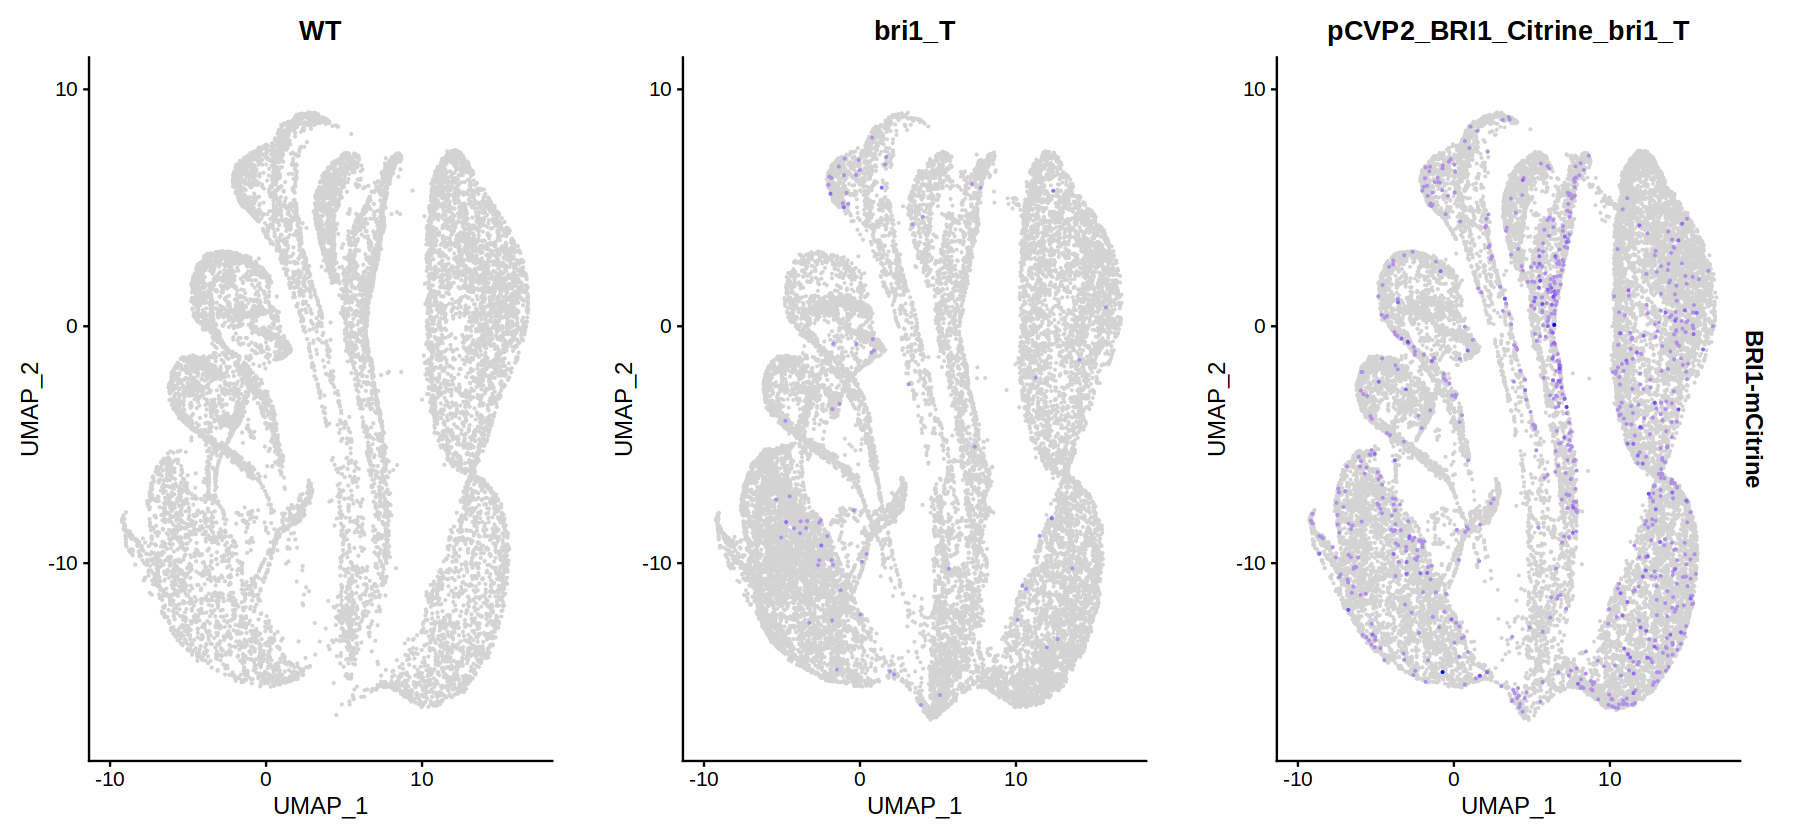

In [27]:
options(repr.plot.width=15, repr.plot.height=7)
FeaturePlot(rc.integrated, features="BRI1-mCitrine", split.by = "geno", order=T)

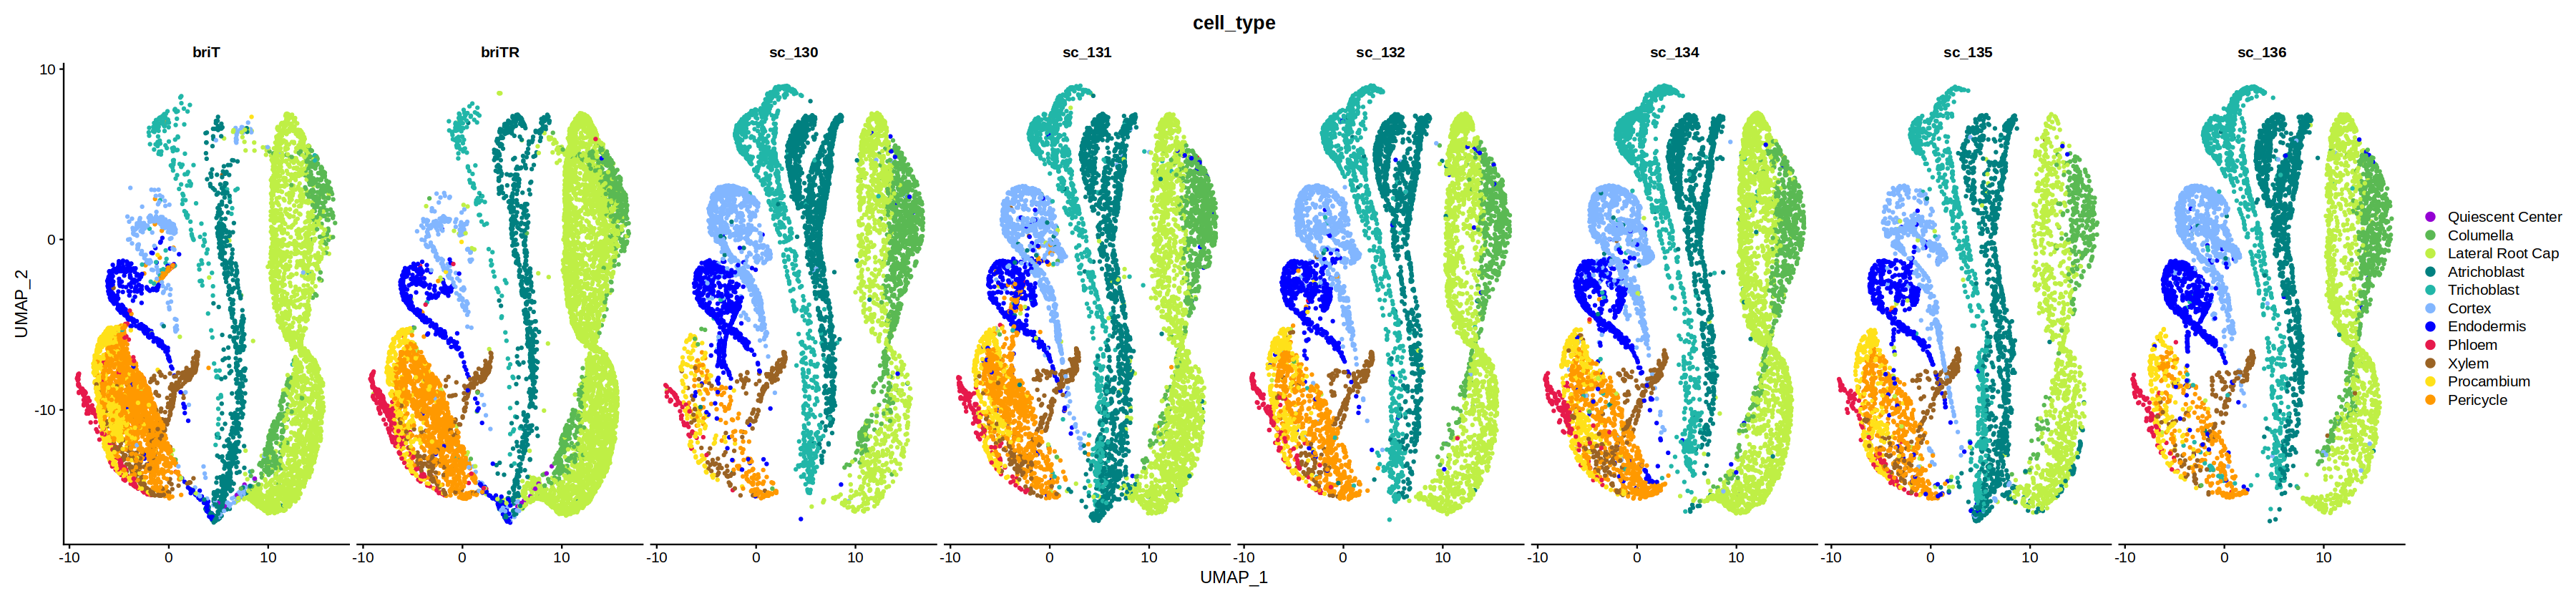

In [22]:
options(repr.plot.width=30, repr.plot.height=7)

(BR_cell <- DimPlot(rc.integrated, reduction = "umap", group.by = "cell_type", cols = color, split.by = 'orig.ident', pt.size = 0.75, ncol=8)) 

Warning message in FeaturePlot(rc.integrated, features = "BRI1-mCitrine", split.by = "orig.ident", :
“All cells have the same value (0) of BRI1-mCitrine.”
Warning message in FeaturePlot(rc.integrated, features = "BRI1-mCitrine", split.by = "orig.ident", :
“All cells have the same value (0) of BRI1-mCitrine.”


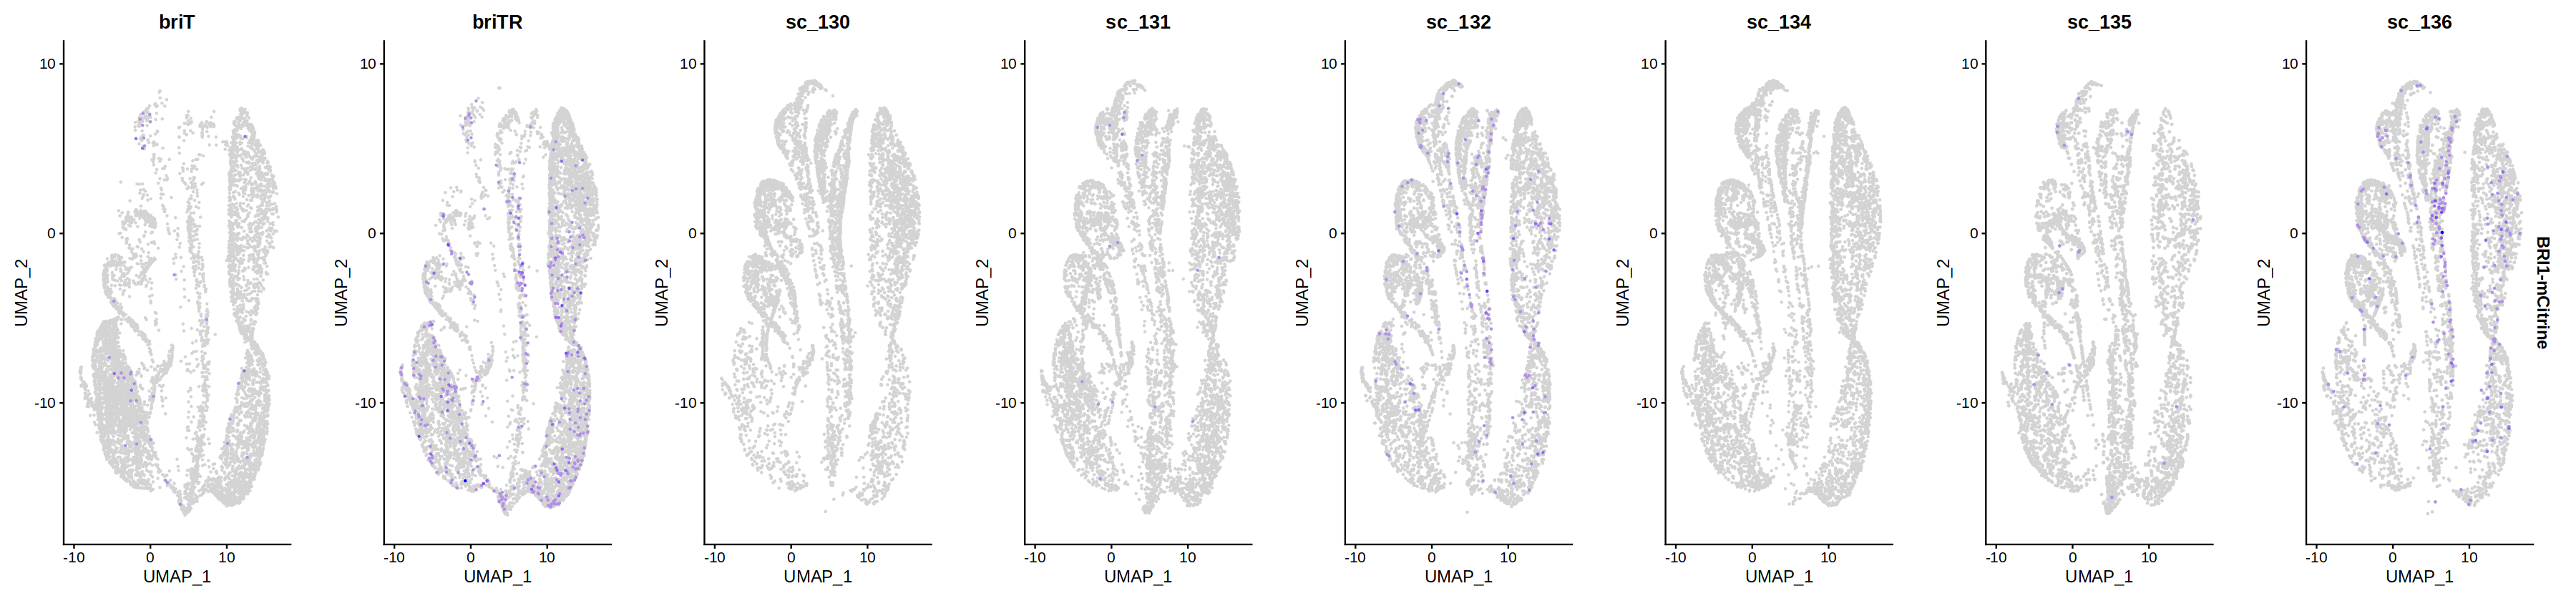

In [23]:
DefaultAssay(rc.integrated) <- "SCT"
FeaturePlot(rc.integrated, features="BRI1-mCitrine", split.by = "orig.ident", order=T)

In [31]:
saveRDS(rc.integrated, file = "/hpc/group/pbenfeylab/CheWei/scRNA-seq/Integrated_Objects/rc.integrated_8S_CVP_BRI1_seu3_annotated_20230316.rds")